Alex Talles Viana

Problema: Como prever o preço de ações da bolsa de valores?

Serão realizadas as análises:

   - Prever o preço da ação com base no últimos 30 dias;
   - Fazer a previsão com base nos dados anteriores;

A base de dados utilizada contêm os preços das ações no período de Janeiro de 2013 até Dezembro de 2019. Disponível em: https://br.financas.yahoo.com/quote/%5EBVSP/history?period1=1388196000&period2=1577502000&interval=1d&filter=history&frequency=1d 

Especificação dos campos:

Date: Data da ação.
Open: Valor da abertura da ação.
High: Valor máximo que a ação foi negociada no dia.
Low:  Valor mínimo que a ação foi negociada no dia.
Close: Valor do fechamento da ação.
Adj Close: Valor computado da ação entre cálculos e dividendos.
Volume: Volume que foi negociado no dia.


In [1]:
# Bibliotecas necessárias ...
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from sklearn.metrics import mean_absolute_error

In [2]:
ds_bvsp = pd.read_csv("BVSP.csv")
ds_bvsp = ds_bvsp.dropna()

In [3]:
# Visualizando os dados ...
ds_bvsp.head(10)

Date     Open     High      Low    Close  Adj Close     Volume
0  2013-01-02  60990.0  62887.0  60990.0  62550.0    62550.0  3739800.0
1  2013-01-03  62555.0  63473.0  62341.0  63312.0    63312.0  3355800.0
2  2013-01-04  63314.0  63314.0  62415.0  62523.0    62523.0  6233800.0
3  2013-01-07  62523.0  62699.0  61639.0  61933.0    61933.0  3985800.0
4  2013-01-08  61933.0  62265.0  61081.0  61128.0    61128.0  3840600.0
5  2013-01-09  61129.0  61812.0  61103.0  61579.0    61579.0  3236400.0
6  2013-01-10  61578.0  61947.0  61156.0  61678.0    61678.0  4100600.0
7  2013-01-11  61662.0  61683.0  61198.0  61497.0    61497.0  3161000.0
8  2013-01-14  61511.0  62285.0  61511.0  62081.0    62081.0  3481400.0
9  2013-01-15  62079.0  62151.0  61695.0  61728.0    61728.0  3819200.0

In [4]:
#%matplotlib inline

In [5]:
# Transformando em DataFrame ...
#df_bvsp = pd.DataFrame(ds_bvsp)

In [6]:
# O Dataset recebendo apenas a coluna "Open", que nesse momento é o que me interessa para realizar as previsões.
ds_bvsp = ds_bvsp.iloc[:, 1].values

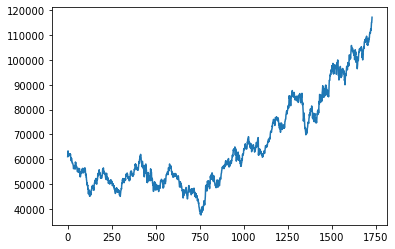

In [7]:
# Apresentando a Série Temporal ...
plt.plot(ds_bvsp)

In [8]:
# Criando variável que representa 30 dias (ações) ...
periodos = 30
# Criando a variáve que represnta como se fosse o horizonte das previsões e esse valor igual a 1 indica o período de 30 ações futuras. 
# Por exemplo, se atribuir o valor igual 2, será 2 períodos para 60 ações futuras e assim por diante.
previsao_futura = 1 

In [9]:
# X representa os atributos previsores, recebe a base do primero registro ...
# Preparando a base de dados de treinamento ...
X = ds_bvsp[0:(len(ds_bvsp) - (len(ds_bvsp) % periodos))]
X_batches = X.reshape(-1, periodos, 1)
print(X_batches)

[[[ 60990.]
  [ 62555.]
  [ 63314.]
  ...
  [ 58495.]
  [ 58406.]
  [ 58076.]]

 [[ 57906.]
  [ 57619.]
  [ 57312.]
  ...
  [ 55677.]
  [ 56035.]
  [ 56348.]]

 [[ 55901.]
  [ 54888.]
  [ 55563.]
  ...
  [ 55446.]
  [ 55106.]
  [ 54442.]]

 ...

 [[103949.]
  [103707.]
  [102991.]
  ...
  [ 98194.]
  [100526.]
  [101133.]]

 [[100626.]
  [ 99706.]
  [101204.]
  ...
  [101244.]
  [101819.]
  [103834.]]

 [[104299.]
  [104486.]
  [105389.]
  ...
  [108692.]
  [108424.]
  [107059.]]]


In [10]:
y = ds_bvsp[1:(len(ds_bvsp) - (len(ds_bvsp) % periodos)) + previsao_futura]
# Inserindo o valor das ações na sequência ...
y_batches = y.reshape(-1, periodos, 1)
print(y_batches)

[[[ 62555.]
  [ 63314.]
  [ 62523.]
  ...
  [ 58406.]
  [ 58076.]
  [ 57906.]]

 [[ 57619.]
  [ 57312.]
  [ 56153.]
  ...
  [ 56035.]
  [ 56348.]
  [ 55901.]]

 [[ 54888.]
  [ 55563.]
  [ 54646.]
  ...
  [ 55106.]
  [ 54442.]
  [ 54668.]]

 ...

 [[103707.]
  [102991.]
  [102654.]
  ...
  [100526.]
  [101133.]
  [100626.]]

 [[ 99706.]
  [101204.]
  [102247.]
  ...
  [101819.]
  [103834.]
  [104299.]]

 [[104486.]
  [105389.]
  [105012.]
  ...
  [108424.]
  [107059.]
  [107708.]]]


In [11]:
# Preparando a base de dados de teste ...
# Obtendo atributos previsores ...
X_teste = ds_bvsp[-(periodos + previsao_futura):]
X_teste = X_teste[:periodos]
X_teste = X_teste.reshape(-1, periodos, 1)
print(X_teste)

[[[107622.]
  [108368.]
  [106751.]
  [106052.]
  [106566.]
  [106269.]
  [105866.]
  [107497.]
  [108692.]
  [108424.]
  [107059.]
  [107708.]
  [108283.]
  [108246.]
  [108931.]
  [108962.]
  [110297.]
  [110623.]
  [111125.]
  [110973.]
  [110672.]
  [110963.]
  [112205.]
  [112565.]
  [111897.]
  [112618.]
  [114313.]
  [115133.]
  [115119.]
  [115864.]]]


In [12]:
# Obtendo respostas esperadas ...
y_teste = ds_bvsp[-(periodos):]
y_teste = y_teste.reshape(-1, periodos, 1)
print(y_teste)

[[[108368.]
  [106751.]
  [106052.]
  [106566.]
  [106269.]
  [105866.]
  [107497.]
  [108692.]
  [108424.]
  [107059.]
  [107708.]
  [108283.]
  [108246.]
  [108931.]
  [108962.]
  [110297.]
  [110623.]
  [111125.]
  [110973.]
  [110672.]
  [110963.]
  [112205.]
  [112565.]
  [111897.]
  [112618.]
  [114313.]
  [115133.]
  [115119.]
  [115864.]
  [117205.]]]


In [13]:
# Interessante realizar o reset para garantir que os dados das redes neurais recorrentes sejam apagados em memória ...
tf.reset_default_graph()

In [14]:
# Recebendo uma entrada, pois está sendo utilizado um atributo previsor.
entradas = 1
# Recebendo o número de neurônios utilizados na camada oculta.
neuronios_oculta = 100
# Recebendo um neurônio,  pois está sendo utilizado um atributo previsor.
neuronios_saida = 1

In [15]:
xph = tf.placeholder(tf.float32, [None, periodos, entradas])
yph = tf.placeholder(tf.float32, [None, periodos, neuronios_saida])

In [16]:
# Recebendo a camada oculta da rede neural recorrente ...
celula = tf.contrib.rnn.LSTMCell(num_units = neuronios_oculta, activation = tf.nn.relu)
# Camada de saída
celula = tf.contrib.rnn.OutputProjectionWrapper(celula, output_size = 1)


For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
This class is equivalent as tf.keras.layers.LSTMCell, and will be replaced by that in Tensorflow 2.0.


In [17]:
# Recebendo a saída da rede neural recorrente dinâmica, passa como parâmetros: camada oculta, placeholder e tipo float ...
saida_rnn, _ = tf.nn.dynamic_rnn(celula, xph, dtype = tf.float32)
# Recebendo o erro ... 
erro = tf.losses.mean_squared_error(labels = yph, predictions = saida_rnn)

Instructions for updating:
Please use `keras.layers.RNN(cell)`, which is equivalent to this API
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


In [18]:
otimizador = tf.train.AdamOptimizer(learning_rate = 0.001)
treinamento = otimizador.minimize(erro)

In [19]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    # Realizando os treinamentos ...
    for epoca in range(1000):
        _, custo = sess.run([treinamento, erro], feed_dict = {xph: X_batches, yph: y_batches})
        if epoca % 100 == 0:
            print(epoca + 1, ' erro: ', custo)
    
    # Recebendo os valores das previsões ...
    previsoes = sess.run(saida_rnn, feed_dict = {xph: X_teste})

1  erro:  3069027800.0
101  erro:  1610504800.0
201  erro:  660875840.0
301  erro:  570924740.0
401  erro:  347763870.0
501  erro:  326401120.0
601  erro:  351565860.0
701  erro:  257891200.0
801  erro:  217794660.0
901  erro:  207003760.0


In [20]:
# Criando a varáviel previssões ...
y_teste.shape
# o método "ravel" realiza o processo de diminuir a dimensão pra ficar apenas os 30 valores. 
y_teste2 = np.ravel(y_teste)
print(y_teste2)

[108368. 106751. 106052. 106566. 106269. 105866. 107497. 108692. 108424.
 107059. 107708. 108283. 108246. 108931. 108962. 110297. 110623. 111125.
 110973. 110672. 110963. 112205. 112565. 111897. 112618. 114313. 115133.
 115119. 115864. 117205.]


In [21]:
novas_previsoes = np.ravel(previsoes)
print(novas_previsoes)

[ 46616.71   70751.1    79783.875  75348.63   82753.36   82000.99
  84452.86   98237.625  83506.51   95796.086  96864.766 107832.76
 107573.41  121225.51  121183.57  135186.34  127150.37   90040.37
 106496.695 104762.61  101742.84  109143.07  104276.13  116759.29
 111559.38  126545.945 118262.55  103922.266 111565.164 111276.03 ]


In [22]:
erro_absoluto = mean_absolute_error(y_teste2, novas_previsoes)

In [23]:
print(erro_absoluto)

14831.477604166666


O erro abosulto indica a média de erro, ou seja, a rede neural está errando em torno de 14.831 reais, o preço de cada uma das ações (pode ser pra mais ou pra menos).

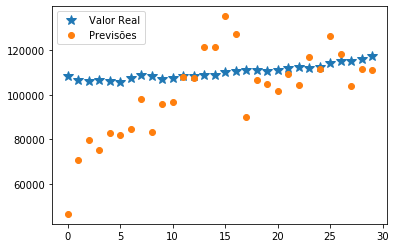

In [24]:
plt.plot(y_teste2, '*', markersize = 10, label = 'Valor Real')
plt.plot(novas_previsoes, 'o', label = 'Previsões')
plt.legend()

In [ ]:
# O gráfico apresenta o processo das previsões e podemos concluir que as previsões estão ruins (fora).

# Outra opção de apresentar as previsões ...

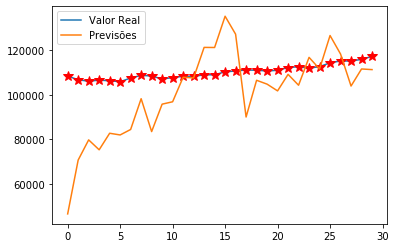

In [25]:
plt.plot(y_teste2, label = 'Valor Real')
plt.plot(y_teste2, 'w*', markersize = 10, color = 'red')
plt.plot(novas_previsoes, label = 'Previsões')
plt.legend()

# Complementando ...

Podemos concluir que a rede neural não consegui capturar os padrões que estão acontecendo com os dados das ações de uma determinada empresa. Nesse momento, não é interessante para o "investidor" investir na empresa. 
Para melhorar a rede neural, precisa fazer mais testes.